In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import spearmanr, pearsonr, kendalltau

In [2]:
population_density = pd.read_csv(r'C:\Users\Anay\Downloads\population-density.csv')
emissions = pd.read_csv(r'C:\Users\Anay\Downloads\owid-co2-data.csv')
global_land_temperatures = pd.read_csv(r'C:\Users\Anay\Downloads\GlobalLandTemperaturesByCountry.csv')
stringency_index = pd.read_csv(r'C:\Users\Anay\Downloads\EPS_15072022074020798.csv')
gdp = pd.read_csv(r'C:\Users\Anay\Downloads\gdp (1).csv')
totalpopulation = pd.read_csv(r'C:\Users\Anay\Downloads\Untitled spreadsheet - API_SP.POP.TOTL_DS2_en_csv_v2_4473555.csv')


In [3]:
gdp

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN,NaN
263,South Africa,ZAF,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,1.235500e+10,1.377739e+10,...,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11,NaN
264,Zambia,ZMB,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,1.264286e+09,1.368000e+09,...,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,NaN


In [4]:
#atextable = stringency_index[stringency_index['Variable'] == 'Environmental Policy Stringency']
#atextable = latextable.drop(['Year', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'])
#rint(latextable.head().to_latex())

In [5]:
population_density2 = population_density[['population_density']]
emissions2 = emissions[['country','year','co2_per_capita']]
merge = pd.merge(population_density, emissions, left_on = ['Entity','Code','Year'], right_on = ['country','iso_code','year'])
merge = merge[merge['Code'] == merge['iso_code']] #Eliminates continents that have Code as NaN and iso_code as NaN
merge = merge[merge['Year'] == merge['year']]
merge
#afg = merge[merge['Entity'] == 'United States']
merge
#corr = merge['population_density'].corr(merge['co2_per_capita'])
#print(corr)

,Entity,Code,Year,population_density,iso_code,country,year,co2,co2_per_capita,trade_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,Afghanistan,AFG,1949,11.678,AFG,Afghanistan,1949,0.015,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1950,11.874,AFG,Afghanistan,1950,0.084,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,Afghanistan,AFG,1951,12.009,AFG,Afghanistan,1951,0.092,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,Afghanistan,AFG,1952,12.156,AFG,Afghanistan,1952,0.092,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,Afghanistan,AFG,1953,12.315,AFG,Afghanistan,1953,0.106,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21089,Zimbabwe,ZWE,2016,36.268,ZWE,Zimbabwe,2016,10.738,0.765,1.415,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226
21090,Zimbabwe,ZWE,2017,36.801,ZWE,Zimbabwe,2017,9.582,0.673,1.666,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093
21091,Zimbabwe,ZWE,2018,37.324,ZWE,Zimbabwe,2018,11.854,0.821,1.308,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091
21092,Zimbabwe,ZWE,2019,37.858,ZWE,Zimbabwe,2019,10.949,0.748,1.473,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,49.427,3374.877,NaN


In [6]:
def turntoyear(Word):
    str(Word)
    word2 = Word[:4]
    return int(word2)
global_land_temperatures['dt'] = global_land_temperatures['dt'].apply(turntoyear)

In [7]:
global_land_temperatures = global_land_temperatures[global_land_temperatures['dt'] >= 1990]
global_land_temperatures
#pd.merge(global_land_temperatures, emissions, left_on = 'dt', right_on = 'year')

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
2954,1990,0.515,0.359,Åland
2955,1990,3.350,0.629,Åland
2956,1990,3.134,0.231,Åland
2957,1990,4.846,0.255,Åland
2958,1990,8.708,0.378,Åland
...,...,...,...,...
577457,2013,19.059,1.022,Zimbabwe
577458,2013,17.613,0.473,Zimbabwe
577459,2013,17.000,0.453,Zimbabwe
577460,2013,19.759,0.717,Zimbabwe


stringency_index.unique()

In [8]:
stringency_index['Value'].unique()

array([1.        , 2.        , 4.        , 5.        , 6.        ,
       0.5       , 0.75      , 2.25      , 2.5       , 2.75      ,
       0.        , 0.66666669, 0.70833331, 0.77083331, 0.85416669,
       1.10416663, 1.21249998, 1.17083335, 1.98333335, 2.44583321,
       2.4041667 , 2.20416665, 2.3375001 , 2.57500005, 2.5999999 ,
       2.5333333 , 2.4666667 , 3.        , 3.5       , 4.25      ,
       4.5       , 4.75      , 5.5       , 2.4000001 , 0.40000001,
       1.20000005, 1.60000002, 0.80000001, 0.33333334, 0.41666666,
       1.25      , 1.5       , 1.83333337, 2.41666675, 2.79999995,
       2.38333344, 2.2833333 , 2.20000005, 1.95000005, 1.68333328,
       0.95833331, 1.02083337, 0.8125    , 0.9375    , 1.73333335,
       2.22916675, 2.2874999 , 1.95416665, 3.61666679, 3.4666667 ,
       3.29166651, 3.76666665, 3.7249999 , 3.83333349, 1.75      ,
       1.125     , 1.22916663, 1.3125    , 1.33333337, 1.52083337,
       1.58333337, 1.64999998, 1.89999998, 1.67083335, 1.62916

In [9]:
stringency_index = stringency_index[stringency_index['Variable'] == 'Environmental Policy Stringency']
merge2 = pd.merge(stringency_index, emissions2, left_on = 'Country', right_on = 'country')
merge2 = merge2[merge2['Year'] == merge2['year']]
merge2 = merge2[merge2['Country'] == merge2['country']]
merge2
corr = merge2['Value'].corr(merge2['co2_per_capita'])
print(corr)

0.1332276822186483


In [10]:
merge = merge[['country', 'Year', 'population_density', 'co2_per_capita']]
merge2 = merge2[['Country', 'year', 'co2_per_capita', 'Value']]
merge5 = pd.merge(merge, merge2, left_on = 'country', right_on = 'Country')
merge5 = merge5[merge5['Year'] == merge5['year']]
merge5 = merge5[merge5['country'] == merge5['Country']]
corr = merge5['population_density'].corr(merge5['Value'])
merge5

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value
3380,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000
3407,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000
3434,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000
3461,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000
3488,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000
...,...,...,...,...,...,...,...,...
118834,United States,2011,34.063,17.781,United States,2011,17.781,2.475000
118861,United States,2012,34.331,17.000,United States,2012,17.000,3.166667
118888,United States,2013,34.589,17.302,United States,2013,17.302,2.666667
118915,United States,2014,34.838,17.331,United States,2014,17.331,2.583333


In [11]:
#isplay(stringency_index)
emissions
stringency_index['RoundedValue'] = stringency_index['Value'].round(decimals = 0)
stringency_index['RoundedValue'].unique()

array([1., 2., 3., 4., 0.])

In [12]:
merge5.drop(columns = ['co2_per_capita_x', 'year'])
merge5['RoundedValue'] = merge5['Value'].round(decimals = 0)
pivot = merge5.pivot(index = 'country', columns = 'Year')
display(pivot)
pivot.columns

population_density                                      \
Year                         1990     1991     1992     1993     1994   
country                                                                 
Australia                   2.205    2.235    2.262    2.289    2.314   
Austria                    93.601   94.192   94.897   95.638   96.307   
Belgium                   330.467  331.554  332.830  334.171  335.400   
Brazil                        NaN      NaN      NaN      NaN      NaN   
Canada                      3.072    3.111    3.148    3.184    3.219   
Denmark                   128.528  128.873  129.291  129.769  130.283   
Finland                    16.439   16.515   16.600   16.688   16.771   
France                    103.490  103.941  104.368  104.775  105.171   
Germany                   226.269  227.520  228.872  230.204  231.361   
Greece                     79.333   80.024   80.840   81.721   82.583   
Hungary                   113.710  113.555  113.507  113.511  113.495   
India                     293.717  299.770  305.835  311.922  318.043   
Indonesia                  96.624   98.317   99.994  101.651  103.284   
Ireland                    50.964   51.063   51.239   51.487   51.792   
Italy                     191.611  191.745  191.937  192.112  192.166   
Japan                     341.578  342.743  343.844  344.876  345.825   
Netherlands               444.474  447.417  450.426  453.460  456.463   
Norway                     11.633   11.694   11.757   11.823   11.891   
Poland                    123.984  124.385  124.759  125.098  125.386   
Portugal                  108.021  108.247  108.632  109.127  109.655   
Russia                        NaN      NaN      NaN    9.060    9.058   
Slovenia                      NaN      NaN      NaN      NaN      NaN   
South Africa               30.336   31.093   31.879   32.672   33.439   
Spain                      78.467   78.661   78.884   79.130   79.383   
Sweden                     21.034   21.176   21.327   21.474   21.601   
Switzerland               168.359  170.028  171.903  173.827  175.585   
United Kingdom            236.161  236.807  237.449  238.095  238.761   
United States              27.562   27.826   28.094   28.372   28.668   

                                                             ... RoundedValue  \
Year               1995     1996     1997     1998     1999  ...         2006   
country                                                      ...                
Australia         2.339    2.365    2.390    2.416    2.443  ...          2.0   
Austria          96.826   97.163   97.345   97.444   97.566  ...          3.0   
Belgium         336.404  337.129  337.642  338.088  338.678  ...          2.0   
Brazil           19.385   19.695   20.006   20.314   20.617  ...          0.0   
Canada            3.253    3.286    3.317    3.349    3.380  ...          2.0   
Denmark         130.818  131.371  131.943  132.510  133.044  ...          3.0   
Finland          16.843   16.902   16.951   16.992   17.031  ...          3.0   
France          105.563  105.947  106.328  106.736  107.211  ...          3.0   
Germany         232.236  232.766  232.982  232.992  232.955  ...          3.0   
Greece           83.363   84.035   84.610   85.106   85.554  ...          2.0   
Hungary         113.405  113.220  112.957  112.641  112.310  ...          3.0   
India           324.205  330.408  336.642  342.892  349.140  ...          1.0   
Indonesia       104.891  106.471  108.029  109.573  111.112  ...          0.0   
Ireland          52.144   52.542   52.999   53.532   54.166  ...          2.0   
Italy           192.034  191.668  191.125  190.585  190.292  ...          3.0   
Japan           346.682  347.446  348.128  348.745  349.317  ...          2.0   
Netherlands     459.396  462.229  464.968  467.646  470.316  ...          3.0   
Norway           11.961   12.033   12.107   12.181   12.254  ...          2.0   
Poland          125.612  125.779  125.894  125.957

MultiIndex([('population_density', 1990),
            ('population_density', 1991),
            ('population_density', 1992),
            ('population_density', 1993),
            ('population_density', 1994),
            ('population_density', 1995),
            ('population_density', 1996),
            ('population_density', 1997),
            ('population_density', 1998),
            ('population_density', 1999),
            ...
            (      'RoundedValue', 2006),
            (      'RoundedValue', 2007),
            (      'RoundedValue', 2008),
            (      'RoundedValue', 2009),
            (      'RoundedValue', 2010),
            (      'RoundedValue', 2011),
            (      'RoundedValue', 2012),
            (      'RoundedValue', 2013),
            (      'RoundedValue', 2014),
            (      'RoundedValue', 2015)],
           names=[None, 'Year'], length=182)

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
4055,Australia,2015,3.111,16.851,Australia,2015,16.851,3.170833,3.0
16559,Brazil,2015,24.464,2.589,Brazil,2015,2.589,0.541667,1.0
22306,Canada,2015,4.018,15.907,Canada,2015,15.907,3.279167,3.0
35797,France,2015,117.710,5.119,France,2015,5.119,3.583333,4.0
41543,Germany,2015,234.093,9.728,Germany,2015,9.728,3.133333,3.0
53716,India,2015,440.655,1.732,India,2015,1.732,1.820833,2.0
57148,Indonesia,2015,137.620,2.134,Indonesia,2015,2.134,1.083333,1.0
65267,Italy,2015,203.468,5.964,Italy,2015,5.964,3.283333,3.0
69245,Japan,2015,351.125,9.559,Japan,2015,9.559,3.166667,3.0
90650,Russia,2015,8.853,11.195,Russia,2015,11.195,0.916667,1.0


-0.502217558457415

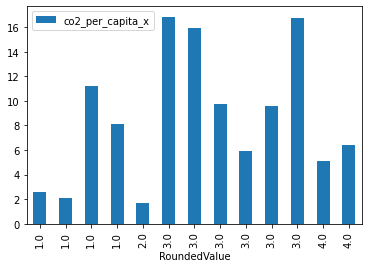

In [13]:
test = merge5[merge5['Year'] == 2015]
display(test)
test = test.sort_values(by = ['RoundedValue'])
test.plot.bar(x = 'RoundedValue', y = 'co2_per_capita_x')
num = test['population_density'].corr(test['co2_per_capita_x'])
num

In [14]:
test2 = merge5[merge5['Year'] == 2000]
display(test2)
print(test2['population_density'].corr(test2['co2_per_capita_x']))

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3650,Australia,2000,2.469,18.525,Australia,2000,18.525,0.979167,1.0
8635,Austria,2000,97.786,8.196,Austria,2000,8.196,2.020833,2.0
13672,Belgium,2000,339.566,12.324,Belgium,2000,12.324,0.854167,1.0
16229,Brazil,2000,20.913,1.946,Brazil,2000,1.946,0.416667,0.0
21901,Canada,2000,3.412,18.522,Canada,2000,18.522,0.895833,1.0
26058,Denmark,2000,133.530,10.165,Denmark,2000,10.165,2.604167,3.0
29761,Finland,2000,17.070,10.994,Finland,2000,10.994,1.604167,2.0
35392,France,2000,107.779,6.878,France,2000,6.878,1.395833,1.0
41138,Germany,2000,232.987,11.055,Germany,2000,11.055,2.062500,2.0
44743,Greece,2000,85.974,9.294,Greece,2000,9.294,1.520833,2.0


-0.1918443239510907


In [15]:
merge5['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015], dtype=int64)

In [16]:
merge5
zero = merge5[merge5['RoundedValue'] == 0.0]
zero['country'].unique()

array(['Australia', 'Brazil', 'Canada', 'Hungary', 'India', 'Indonesia',
       'Ireland', 'Russia', 'South Africa'], dtype=object)

In [17]:
totalcorr = []
length = []
finalt = []
othert = []
for i in range(1990, 2016):
    t = merge5[merge5['Year'] == i]
    length.append(len(t))
    totalcorr.append(t['population_density'].corr(t['co2_per_capita_x']))
    if i == 2010:
        othert = t
    finalt = t
#display(length)
#totalcorr
display(othert)
display(finalt)

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3920,Australia,2010,2.880,18.260,Australia,2010,18.260,2.504167,3.0
8875,Austria,2010,101.914,8.561,Austria,2010,8.561,3.329167,3.0
13912,Belgium,2010,361.253,10.471,Belgium,2010,10.471,2.600000,3.0
16449,Brazil,2010,23.416,2.250,Brazil,2010,2.250,0.416667,0.0
22171,Canada,2010,3.809,16.364,Canada,2010,16.364,3.354167,3.0
26298,Denmark,2010,138.871,8.852,Denmark,2010,8.852,4.025000,4.0
30001,Finland,2010,17.655,11.947,Finland,2010,11.947,3.212500,3.0
35662,France,2010,114.837,5.989,France,2010,5.989,3.150000,3.0
41408,Germany,2010,231.344,10.305,Germany,2010,10.305,3.016667,3.0
44983,Greece,2010,84.466,8.942,Greece,2010,8.942,2.333333,2.0


,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
4055,Australia,2015,3.111,16.851,Australia,2015,16.851,3.170833,3.0
16559,Brazil,2015,24.464,2.589,Brazil,2015,2.589,0.541667,1.0
22306,Canada,2015,4.018,15.907,Canada,2015,15.907,3.279167,3.0
35797,France,2015,117.710,5.119,France,2015,5.119,3.583333,4.0
41543,Germany,2015,234.093,9.728,Germany,2015,9.728,3.133333,3.0
53716,India,2015,440.655,1.732,India,2015,1.732,1.820833,2.0
57148,Indonesia,2015,137.620,2.134,Indonesia,2015,2.134,1.083333,1.0
65267,Italy,2015,203.468,5.964,Italy,2015,5.964,3.283333,3.0
69245,Japan,2015,351.125,9.559,Japan,2015,9.559,3.166667,3.0
90650,Russia,2015,8.853,11.195,Russia,2015,11.195,0.916667,1.0


In [18]:
#averagecorr = totalcorr/26
#averagecorr

(array([44.,  3.,  0.,  2., 14.,  5.,  2.,  0.,  0., 13.]),
 array([ 0.662 ,  2.3748,  4.0876,  5.8004,  7.5132,  9.226 , 10.9388,
        12.6516, 14.3644, 16.0772, 17.79  ]),
 <BarContainer object of 10 artists>)

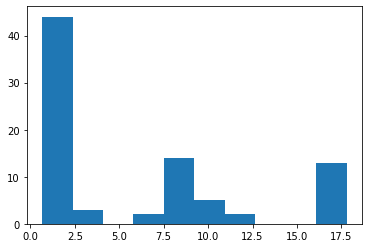

In [19]:
zero = merge5[merge5['RoundedValue'] == 0.0]
one = merge5[merge5['RoundedValue'] == 1.0]
two = merge5[merge5['RoundedValue'] == 2.0]
three = merge5[merge5['RoundedValue'] == 3.0]
four = merge5[merge5['RoundedValue'] == 4.0]
zero['co2_per_capita_x'].unique()
plt.hist(zero['co2_per_capita_x'])

In [20]:
merge5

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3380,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0.0
3407,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0.0
3434,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0.0
3461,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1.0
3488,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0.0
...,...,...,...,...,...,...,...,...,...
118834,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2.0
118861,United States,2012,34.331,17.000,United States,2012,17.000,3.166667,3.0
118888,United States,2013,34.589,17.302,United States,2013,17.302,2.666667,3.0
118915,United States,2014,34.838,17.331,United States,2014,17.331,2.583333,3.0


,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue


<AxesSubplot:xlabel='Rounded Value EPS', ylabel='Carbon Dioxide Per Capita'>

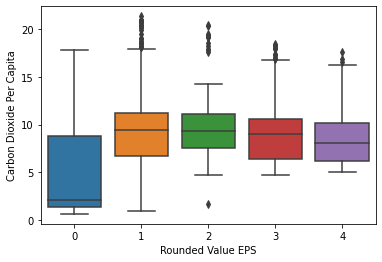

In [21]:
lessthanzero = merge5[merge5['co2_per_capita_x'] < 0]
merge5['RoundedValue'] = merge5['RoundedValue'].astype(int)
display(lessthanzero)
violin = sb.boxplot(x = 'RoundedValue', y = 'co2_per_capita_x', data = merge5)
plt.ylabel('Carbon Dioxide Per Capita')
plt.xlabel('Rounded Value EPS')
plt.savefig('boxplot.png')
violin

{'bodies': [<matplotlib.collections.PolyCollection at 0x23201c39d60>,
 'cmeans': <matplotlib.collections.LineCollection at 0x232001fe430>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x23201d2a130>,
 'cmins': <matplotlib.collections.LineCollection at 0x23201d2a490>,
 'cbars': <matplotlib.collections.LineCollection at 0x23201d2a7f0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x23201d2ab50>}

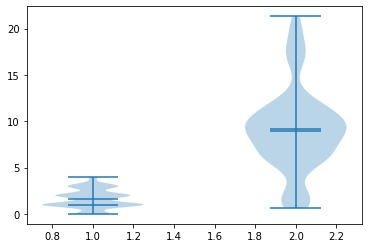

In [22]:
datatoplot = [merge5['RoundedValue'], merge5['co2_per_capita_x']]
plt.violinplot(datatoplot,showmeans=True, showextrema=True, showmedians=True)

In [23]:
merge

,country,Year,population_density,co2_per_capita
0,Afghanistan,1949,11.678,0.002
1,Afghanistan,1950,11.874,0.011
2,Afghanistan,1951,12.009,0.012
3,Afghanistan,1952,12.156,0.012
4,Afghanistan,1953,12.315,0.013
...,...,...,...,...
21089,Zimbabwe,2016,36.268,0.765
21090,Zimbabwe,2017,36.801,0.673
21091,Zimbabwe,2018,37.324,0.821
21092,Zimbabwe,2019,37.858,0.748


In [24]:
gdp = gdp[gdp['Country Name'].isin(merge5['country'])]
l = ['Germany', 'Denmark', 'Hungary', 'Indonesia', 'Poland', 'Slovenia']
gdp = gdp[gdp['Country Name'].isin(l) == False]
gdp = gdp.drop(columns = ['Unnamed: 65'])
gdp = gdp.melt(id_vars=["Country Name", "Code"], 
        var_name="Date", 
        value_name="GDP")
gdp

,Country Name,Code,Date,GDP
0,Australia,AUS,1960,1.860679e+10
1,Austria,AUT,1960,6.592694e+09
2,Belgium,BEL,1960,1.165872e+10
3,Brazil,BRA,1960,NaN
4,Canada,CAN,1960,4.046172e+10
...,...,...,...,...
1276,Norway,NOR,2020,3.621983e+11
1277,Portugal,PRT,2020,2.285392e+11
1278,Sweden,SWE,2020,5.412201e+11
1279,United States,USA,2020,2.095303e+13


In [25]:
gdp['Date'] = gdp['Date'].astype('int')
gdpmerge = pd.merge(merge, gdp, left_on = ['country', 'Year'], right_on = ['Country Name', 'Date'])

In [26]:
aus = gdpmerge[gdpmerge['country'] == 'Australia']

In [27]:
print(gdpmerge['GDP'].corr(gdpmerge['co2_per_capita']))

0.34792476530278516


[0]

[-0.32758766809851314]

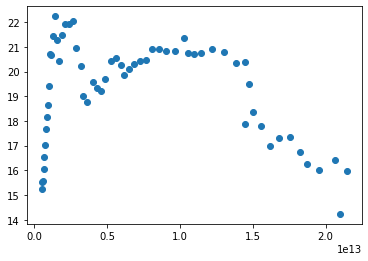

In [28]:
total = []
positive = []
negative = []
#for i in gdpmerge['country'].unique():
for i in range(1):
    cou = gdpmerge[gdpmerge['country'] == 'United States']
    cou = cou.dropna()
    plt.scatter(cou['GDP'], cou['co2_per_capita'])
    t = pearsonr(cou['GDP'], cou['co2_per_capita'])[0]
    total.append(t)
    if t > 0:
        positive.append(i)
    else:
        negative.append(i)
#display(positive)
display(negative)
total
#make a scatterplot

In [29]:
gdpmerge['country'].unique()
#avg = total/len(gdpmerge['country'].unique())
#avg

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Finland',
       'France', 'Greece', 'India', 'Ireland', 'Italy', 'Japan',
       'Netherlands', 'Norway', 'Portugal', 'South Africa', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

In [30]:
merge5

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3380,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0
3407,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0
3434,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0
3461,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1
3488,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0
...,...,...,...,...,...,...,...,...,...
118834,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2
118861,United States,2012,34.331,17.000,United States,2012,17.000,3.166667,3
118888,United States,2013,34.589,17.302,United States,2013,17.302,2.666667,3
118915,United States,2014,34.838,17.331,United States,2014,17.331,2.583333,3


In [31]:
totalcorrstringency = 0
for i in range(1990, 2013):
    t = merge5[merge5['Year'] == i]
    totalcorrstringency += t['Value'].corr(t['co2_per_capita_x'])
totalcorrstringency

4.145312442479546

In [32]:
print(totalcorrstringency/26)

0.159435093941521


In [33]:
#display(othert)
finalt
othert = othert[~othert['country'].isin(finalt['country'].unique())]
othert
pddf = merge5[merge5['country'].isin(othert['country'].unique())]
pddf = pddf.reset_index()
pddf

,index,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
0,8395,Austria,1990,93.601,8.045,Austria,1990,8.045,1.166667,1
1,8419,Austria,1991,94.192,8.458,Austria,1991,8.458,1.416667,1
2,8443,Austria,1992,94.897,7.692,Austria,1992,7.692,1.416667,1
3,8467,Austria,1993,95.638,7.686,Austria,1993,7.686,1.479167,1
4,8491,Austria,1994,96.307,7.680,Austria,1994,7.680,1.479167,1
...,...,...,...,...,...,...,...,...,...,...
322,107170,Switzerland,2008,192.905,5.866,Switzerland,2008,5.866,2.666667,3
323,107194,Switzerland,2009,195.209,5.644,Switzerland,2009,5.644,3.187500,3
324,107218,Switzerland,2010,197.608,5.769,Switzerland,2010,5.769,3.333333,3
325,107242,Switzerland,2011,200.096,5.183,Switzerland,2011,5.183,3.291667,3


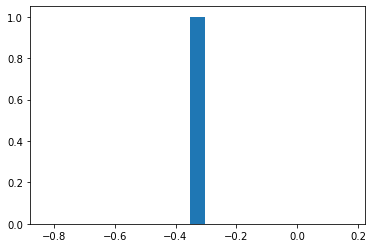

In [34]:
total
plt.hist(total, bins = 21)
plt.savefig('distribution.png')

In [35]:
gdpmerge

,country,Year,population_density,co2_per_capita,Country Name,Code,Date,GDP
0,Australia,1960,1.332,8.604,Australia,AUS,1960,1.860679e+10
1,Australia,1961,1.358,8.664,Australia,AUS,1961,1.968306e+10
2,Australia,1962,1.384,8.909,Australia,AUS,1962,1.992272e+10
3,Australia,1963,1.410,9.307,Australia,AUS,1963,2.153993e+10
4,Australia,1964,1.439,9.839,Australia,AUS,1964,2.380110e+10
...,...,...,...,...,...,...,...,...
1276,United States,2016,35.312,16.247,United States,USA,2016,1.874508e+13
1277,United States,2017,35.538,16.020,United States,USA,2017,1.954298e+13
1278,United States,2018,35.758,16.434,United States,USA,2018,2.061186e+13
1279,United States,2019,35.974,15.972,United States,USA,2019,2.143322e+13


(0.6307952451525133, 0.002863180321249921)
(0.6130760670088209, 0.003125012568911347)
(0.6013374403864875, 0.0039336375171939945)
(0.5915170679908691, 0.004737480874834637)
(0.5871353849283193, 0.005137742894806589)
(0.5866389580415559, 0.0051848066300871146)
(0.6056855329460997, 0.0036159163480991388)
(0.6119424627938682, 0.003196472354949659)
(0.5903718175329864, 0.004839510685158794)
(0.5964368290396482, 0.004319256013942333)
(0.5956967841083691, 0.005580563988855676)
(0.6026655681229716, 0.004917400175601696)
(0.5958548707238318, 0.00556474436993238)
(0.5907553853596597, 0.006094032106487891)
(0.5868420313405435, 0.006527669867056262)
(0.5754744400036513, 0.007932957531605512)
(0.5857303183374698, 0.0066553714444654195)
(0.5868377042076875, 0.006528162995274044)
(0.5485542240350876, 0.012262655167701851)
(0.5268700611127377, 0.016992951761763613)
(0.5120158048155387, 0.017651415836786696)
(0.5165965044334085, 0.016496703208984134)
(0.5220450858186383, 0.015203293160067504)
(0.54445

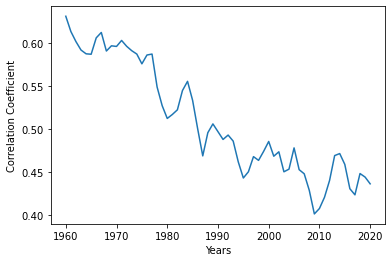

In [36]:
correlations = []
correlationssig = []
for i in range(1960, 2021):
    year = gdpmerge[gdpmerge['Year'] == i]
    year = year.dropna()
    #display(year)
    val = pearsonr(year['co2_per_capita'], year['GDP'])
    print(val)
    correlations.append(val[0])
    correlationssig.append(val[1])
plt.plot(range(1960,2021), correlations)
plt.xlabel("Years")
plt.ylabel("Correlation Coefficient")
plt.savefig('correlationslineplot.png')

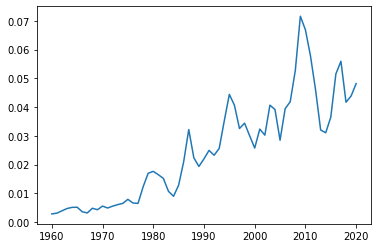

In [37]:
plt.plot(range(1960,2021), correlationssig)
plt.savefig('significance.png')

In [38]:
merge5

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3380,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0
3407,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0
3434,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0
3461,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1
3488,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0
...,...,...,...,...,...,...,...,...,...
118834,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2
118861,United States,2012,34.331,17.000,United States,2012,17.000,3.166667,3
118888,United States,2013,34.589,17.302,United States,2013,17.302,2.666667,3
118915,United States,2014,34.838,17.331,United States,2014,17.331,2.583333,3


In [39]:
print(gdpmerge.loc[0]['GDP'])

18606786874.23


In [40]:
nineteenninetyfive = merge5[merge5['Year'] == 1995]
twentyeleven = merge5[merge5['Year'] == 2011]
twentyfifteen = merge5[merge5['Year'] == 2015]
display(nineteenninetyfive['Country'].unique())
display(twentyeleven['Country'].unique())
display(twentyfifteen['Country'].unique())

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India',
       'Indonesia', 'Ireland', 'Italy', 'Japan', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'Russia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'United States'], dtype=object)

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India',
       'Indonesia', 'Ireland', 'Italy', 'Japan', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'Russia', 'Slovenia', 'South Africa',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States'], dtype=object)

array(['Australia', 'Brazil', 'Canada', 'France', 'Germany', 'India',
       'Indonesia', 'Italy', 'Japan', 'Russia', 'South Africa',
       'United Kingdom', 'United States'], dtype=object)

In [41]:
countries = ['Australia', 'Brazil', 'Canada', 'France', 'Germany', 'India',
       'Indonesia', 'Italy', 'Japan', 'Russia', 'South Africa',
       'United Kingdom', 'United States']
countrymerge = merge5[merge5['Country'].isin(countries)]

(-0.47674311286255705, 0.1381735955719413)
(-0.48879734180123985, 0.12708632222024704)
(-0.4960365895199837, 0.1207093986699525)
(-0.5231014876117068, 0.08095693299127064)
(-0.5106789822429304, 0.08977444094287089)
(-0.36870532318351656, 0.2150877025101301)
(-0.36971037974875176, 0.21374317239816984)
(-0.3868045818675321, 0.19166963609213442)
(-0.3952824531612348, 0.1812766250932752)
(-0.40276503914911393, 0.17240699356630507)
(-0.40534051162689405, 0.1694195653625893)
(-0.4091711696686407, 0.16503793648327014)
(-0.40839835058944396, 0.16591597509683714)
(-0.4234038066048912, 0.14940068388373987)
(-0.44012311583280994, 0.13230708147933057)
(-0.436340339540352, 0.13605533915080914)
(-0.45034367476322024, 0.12252374407904583)
(-0.45917111678286066, 0.11447294070889298)
(-0.47963653031270126, 0.09719629638580492)
(-0.4935296699052041, 0.0865402706462313)
(-0.48444016818218805, 0.09341568540273448)
(-0.4937871112194975, 0.08635078127567386)
(-0.48286796047123215, 0.09464176995126176)
(-0.4

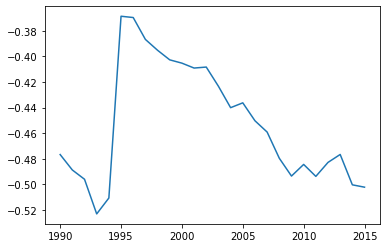

In [42]:
c = []
csig = []
cnum = []
for i in range(1990, 2016):
    year = countrymerge[countrymerge['Year'] == i]
    #display(year)u
    val = pearsonr(year['population_density'], year['co2_per_capita_x'])
    print(val)
    cnum.append(len(year['Country']))
    c.append(val[0])
    csig.append(val[1])
plt.plot(range(1990,2016), c)
plt.savefig('popdensvsco2.png')

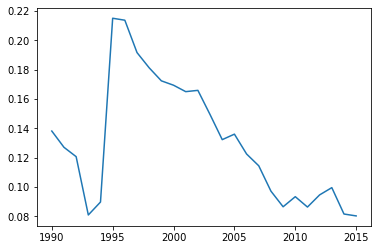

In [43]:
plt.plot(range(1990, 2016), csig)
plt.savefig('popvsco2sig.png')

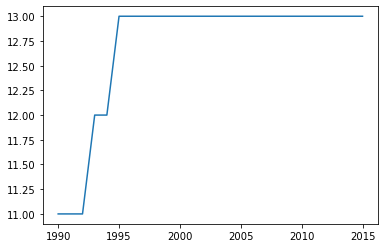

In [44]:
plt.plot(range(1990, 2016), cnum)

KendalltauResult(correlation=0.36242426981557313, pvalue=0.011566776402689894)
KendalltauResult(correlation=0.2386638891357491, pvalue=0.0968202252114674)
KendalltauResult(correlation=0.15126584522688322, pvalue=0.2925236320540411)
KendalltauResult(correlation=0.2149699617284306, pvalue=0.1273032284856516)
KendalltauResult(correlation=0.21362638630551367, pvalue=0.1279221761537343)
KendalltauResult(correlation=0.2575131013123024, pvalue=0.060456966534020676)
KendalltauResult(correlation=0.2428581341168561, pvalue=0.07626882505563225)
KendalltauResult(correlation=0.2028579708505504, pvalue=0.13866673186026018)
KendalltauResult(correlation=0.17739791423736387, pvalue=0.19588940692684953)
KendalltauResult(correlation=0.14964787840382696, pvalue=0.2775454537872415)
KendalltauResult(correlation=0.09455742659260487, pvalue=0.4910456211070766)
KendalltauResult(correlation=0.19198022974862203, pvalue=0.16212550458434882)
KendalltauResult(correlation=0.06590366095848219, pvalue=0.63130118190781

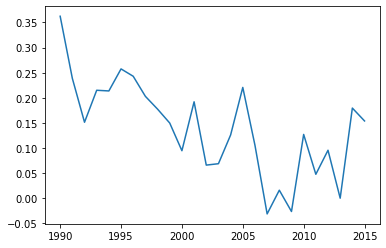

In [45]:
co = []
for i in range(1990, 2016):
    year = merge5[merge5['Year'] == i]
    #display(year)
    val = kendalltau(year['population_density'], year['Value'])
    print(val)
    co.append(val[0])
plt.plot(range(1990, 2016), co)

KendalltauResult(correlation=0.12380952380952383, pvalue=0.4550436580067618)
KendalltauResult(correlation=0.1142857142857143, pvalue=0.4920749967194731)
KendalltauResult(correlation=0.1523809523809524, pvalue=0.35364385023332723)
KendalltauResult(correlation=0.1619047619047619, pvalue=0.3232088737909401)
KendalltauResult(correlation=0.17142857142857143, pvalue=0.2944906590580466)
KendalltauResult(correlation=0.17142857142857143, pvalue=0.2944906590580466)
KendalltauResult(correlation=0.1523809523809524, pvalue=0.35364385023332723)
KendalltauResult(correlation=0.1523809523809524, pvalue=0.35364385023332723)
KendalltauResult(correlation=0.17142857142857143, pvalue=0.2944906590580466)
KendalltauResult(correlation=0.1619047619047619, pvalue=0.3232088737909401)
KendalltauResult(correlation=0.14285714285714285, pvalue=0.3857814338605447)
KendalltauResult(correlation=0.1619047619047619, pvalue=0.3232088737909401)
KendalltauResult(correlation=0.17142857142857143, pvalue=0.2944906590580466)
Ken

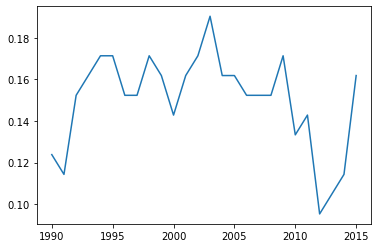

In [46]:
co = []
for i in range(1990, 2016):
    year = gdpmerge[gdpmerge['Year'] == i]
    #display(year)
    val = kendalltau(year['population_density'], year['GDP'])
    print(val)
    co.append(val[0])
plt.plot(range(1990, 2016), co)

KendalltauResult(correlation=0.10026420125303973, pvalue=0.5373890154357488)
KendalltauResult(correlation=0.07957811640969131, pvalue=0.625950445847206)
KendalltauResult(correlation=-0.010638899909514296, pvalue=0.948135357928962)
KendalltauResult(correlation=-0.043020701971832345, pvalue=0.7940741479576621)
KendalltauResult(correlation=-0.010638899909514296, pvalue=0.9481536104652548)
KendalltauResult(correlation=-0.004796287192241285, pvalue=0.9758769956896374)
KendalltauResult(correlation=-0.00956948752938691, pvalue=0.9517980416023076)
KendalltauResult(correlation=-0.05250611612542334, pvalue=0.739649383448021)
KendalltauResult(correlation=-0.00956948752938691, pvalue=0.9517980416023076)
KendalltauResult(correlation=0.038651402376829895, pvalue=0.8085376311756376)
KendalltauResult(correlation=0.014319849852388185, pvalue=0.9277849269223342)
KendalltauResult(correlation=0.02870846258816073, pvalue=0.8560952404803239)
KendalltauResult(correlation=-0.047847437646934554, pvalue=0.76246

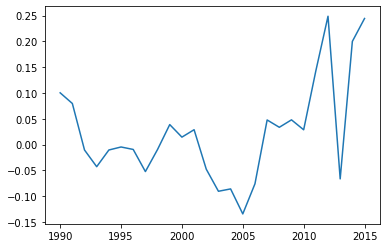

In [47]:
gdp
stringency_index = stringency_index[stringency_index['VAR'] == 'EPS']
stringency_index
gdpstringencymerge = pd.merge(stringency_index, gdp, left_on = ['Year', 'Country'], right_on = ['Date', 'Country Name'])
gdpstringencymerge
cor = []
for i in range(1990, 2016):
    year = gdpstringencymerge[gdpstringencymerge['Year'] == i]
    #display(year)
    val = kendalltau(year['Value'], year['GDP'])
    print(val)
    cor.append(val[0])
plt.plot(range(1990, 2016), cor)

In [48]:
merge5

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3380,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0
3407,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0
3434,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0
3461,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1
3488,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0
...,...,...,...,...,...,...,...,...,...
118834,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2
118861,United States,2012,34.331,17.000,United States,2012,17.000,3.166667,3
118888,United States,2013,34.589,17.302,United States,2013,17.302,2.666667,3
118915,United States,2014,34.838,17.331,United States,2014,17.331,2.583333,3


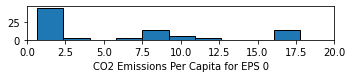

In [49]:
plt.figure(figsize = [5,1])
plt.hist(zero['co2_per_capita_x'], edgecolor = "black")
plt.xlim(0,20)
plt.tight_layout()
plt.xlabel('CO2 Emissions Per Capita for EPS 0')
plt.savefig('zero.pdf')

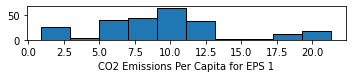

In [50]:
plt.figure(figsize = [5,1])
plt.hist(one['co2_per_capita_x'], edgecolor = "black")
plt.tight_layout()
plt.xlabel('CO2 Emissions Per Capita for EPS 1')
plt.savefig('one.pdf')

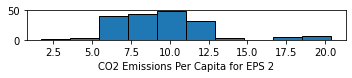

In [51]:
plt.figure(figsize = [5,1])
plt.hist(two['co2_per_capita_x'], edgecolor = "black")
plt.tight_layout()
plt.xlabel('CO2 Emissions Per Capita for EPS 2')
plt.savefig('two.pdf')

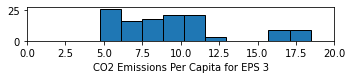

In [52]:
plt.figure(figsize = [5,1])
plt.hist(three['co2_per_capita_x'], edgecolor = "black")
plt.xlim(0,20)
plt.tight_layout()
plt.xlabel('CO2 Emissions Per Capita for EPS 3')
plt.savefig('three.pdf')

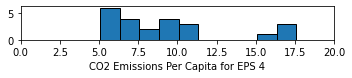

In [53]:
plt.figure(figsize = [5,1])
plt.hist(four['co2_per_capita_x'], edgecolor = "black")
plt.xlim(0,20)
plt.tight_layout()
plt.xlabel('CO2 Emissions Per Capita for EPS 4')
plt.savefig('four.pdf')

In [54]:
merge5


,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3380,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0
3407,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0
3434,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0
3461,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1
3488,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0
...,...,...,...,...,...,...,...,...,...
118834,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2
118861,United States,2012,34.331,17.000,United States,2012,17.000,3.166667,3
118888,United States,2013,34.589,17.302,United States,2013,17.302,2.666667,3
118915,United States,2014,34.838,17.331,United States,2014,17.331,2.583333,3


(0.4868818758436984, 0.013577034639935889)
(0.3248263352753795, 0.11312771106969392)
(0.12043351903077146, 0.5663517750357587)
(0.20986159291404033, 0.3034909571840877)
(0.19808930610021502, 0.33202487214298926)
(0.2254759311194378, 0.2581367652444614)
(0.1954686826518519, 0.32852327977038337)
(0.21036377487492136, 0.2922485199590572)
(0.173214207701836, 0.38757887757679393)
(0.16701839592129378, 0.40503679227169614)
(0.07973974477307202, 0.6925739497521142)
(0.15608701949982623, 0.4368890126133437)
(0.07771622071660839, 0.7000148099265275)
(0.09385090446792543, 0.6414889374200262)
(0.11979286777405179, 0.5517381377657834)
(0.2188282359026895, 0.27280812921748404)
(0.06300078214748421, 0.7549025282440033)
(-0.0006638277829711797, 0.9973780586779879)
(0.05087005251862334, 0.7971225580384783)
(0.020319398193499677, 0.9182578910352464)
(0.16878409200578237, 0.3905687955533676)
(0.09986879876507777, 0.6131166169525488)
(0.151515884472345, 0.4415058282131026)
(0.13639694758673765, 0.6568111

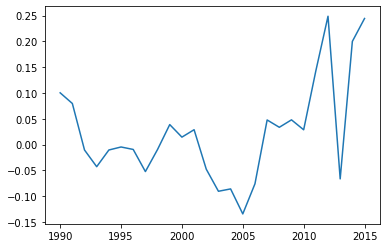

In [55]:
relations = []
for i in range(1990, 2016):
    year = merge5[merge5['Year'] == i]
    #display(year)
    val = pearsonr(year['Value'], year['population_density'])
    print(val)
    relations.append(val[0])
plt.plot(range(1990, 2016), cor)

In [56]:
merge5

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3380,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0
3407,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0
3434,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0
3461,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1
3488,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0
...,...,...,...,...,...,...,...,...,...
118834,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2
118861,United States,2012,34.331,17.000,United States,2012,17.000,3.166667,3
118888,United States,2013,34.589,17.302,United States,2013,17.302,2.666667,3
118915,United States,2014,34.838,17.331,United States,2014,17.331,2.583333,3


In [57]:
merge6 = merge5[merge5['Year'] < 2013]
group = merge6.groupby(by = 'country', as_index = False).agg({'Year':'count'})
group = group[group['Year'] >= 23]
merge6 = merge6[merge6['Country'].isin(group['country'])]
merge6

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3380,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0
3407,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0
3434,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0
3461,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1
3488,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0
...,...,...,...,...,...,...,...,...,...
118753,United States,2008,33.177,19.487,United States,2008,19.487,2.475000,2
118780,United States,2009,33.486,17.885,United States,2009,17.885,2.933333,3
118807,United States,2010,33.781,18.368,United States,2010,18.368,2.683333,3
118834,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2


In [58]:
merge7 = merge6.groupby(by = 'Year', as_index = False).agg({'co2_per_capita_x':'sum'})
merge7

,Year,co2_per_capita_x
0,1990,230.442
1,1991,232.474
2,1992,228.382
3,1993,227.740
4,1994,231.438
5,1995,232.741
6,1996,241.081
7,1997,238.165
8,1998,237.971
9,1999,237.586


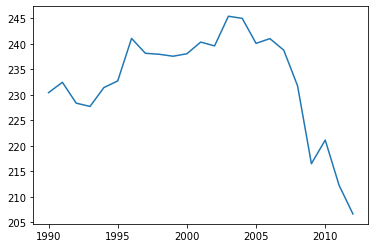

In [59]:
plt.plot(range(1990, 2013), merge7['co2_per_capita_x'])

In [60]:
merge6

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3380,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0
3407,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0
3434,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0
3461,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1
3488,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0
...,...,...,...,...,...,...,...,...,...
118753,United States,2008,33.177,19.487,United States,2008,19.487,2.475000,2
118780,United States,2009,33.486,17.885,United States,2009,17.885,2.933333,3
118807,United States,2010,33.781,18.368,United States,2010,18.368,2.683333,3
118834,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2


In [61]:
totalpopulation

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1806279.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,30490639.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,60041996.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,18920657.0


In [62]:
#popmerge = pd.merge(merge6, totalpopulation, left_on = ['country', 'Year'], right_on = ['Entity', 'Year'])

In [63]:
merge5

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3380,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0
3407,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0
3434,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0
3461,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1
3488,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0
...,...,...,...,...,...,...,...,...,...
118834,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2
118861,United States,2012,34.331,17.000,United States,2012,17.000,3.166667,3
118888,United States,2013,34.589,17.302,United States,2013,17.302,2.666667,3
118915,United States,2014,34.838,17.331,United States,2014,17.331,2.583333,3


In [64]:
totalpopulation

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1806279.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,30490639.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,60041996.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,18920657.0


In [65]:
#mergepopulation = pd.merge(merge5, totalpopulation, left_on = ['country', 'Year'], right_on = ['Entity', 'Year'])
#mergepopulation

In [66]:
totalpopulation['Indicator Name'].unique()

array(['Population, total'], dtype=object)

In [67]:
totalpopulation


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1806279.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,30490639.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,60041996.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,18920657.0


In [68]:
totalpopulation

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1806279.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,30490639.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,60041996.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,18920657.0


In [69]:
totalpopulation = totalpopulation.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1)

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue,Country Name,variable,value,Total Emissions
0,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0,Australia,1990,17065100.0,2.810793e+08
1,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0,Australia,1991,17284000.0,2.834230e+08
2,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0,Australia,1992,17495000.0,2.878627e+08
3,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1,Australia,1993,17667000.0,2.923888e+08
4,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0,Australia,1994,17855000.0,3.010353e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2,United States,2011,311583481.0,5.540266e+09
630,United States,2012,34.331,17.000,United States,2012,17.000,3.166667,3,United States,2012,313877662.0,5.335920e+09
631,United States,2013,34.589,17.302,United States,2013,17.302,2.666667,3,United States,2013,316059947.0,5.468469e+09
632,United States,2014,34.838,17.331,United States,2014,17.331,2.583333,3,United States,2014,318386329.0,5.517953e+09


,Year,value
0,1990,1.934271e+09
1,1991,1.962684e+09
2,1992,1.991292e+09
3,1993,2.019488e+09
4,1994,2.047088e+09
5,1995,2.236477e+09
6,1996,2.266353e+09
7,1997,2.296234e+09
8,1998,2.325907e+09
9,1999,2.355525e+09


,Year,Total Emissions
0,1990,1.192736e+10
1,1991,1.200692e+10
2,1992,1.211788e+10
3,1993,1.223309e+10
4,1994,1.246390e+10
5,1995,1.294505e+10
6,1996,1.338700e+10
7,1997,1.350491e+10
8,1998,1.350226e+10
9,1999,1.371471e+10


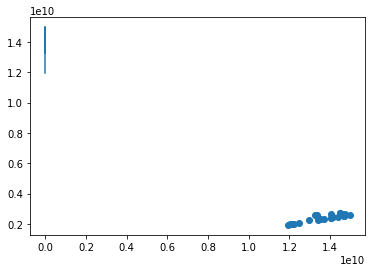

In [70]:
totalpopulation2 = pd.melt(totalpopulation, id_vars=["Country Name"]).sort_values(by = ['Country Name', 'variable'])
totalpopulation2['variable'] = totalpopulation2['variable'].astype(int)
newmerge = pd.merge(merge5, totalpopulation2, left_on = ['country', 'Year'], right_on = ['Country Name', 'variable'])
newmerge['Total Emissions'] = newmerge['co2_per_capita_x'] * newmerge['value']
newmerge2 = newmerge.groupby(by = 'Year', as_index = False).agg({'Total Emissions':'sum'})
newmerge2
display(newmerge)
newmerge3 = newmerge.groupby(by = 'Year', as_index = False).agg({'value':'sum'})
display(newmerge3)
display(newmerge2)
plt.plot(newmerge2['Total Emissions'])
plt.scatter(newmerge2['Total Emissions'], newmerge3['value'])

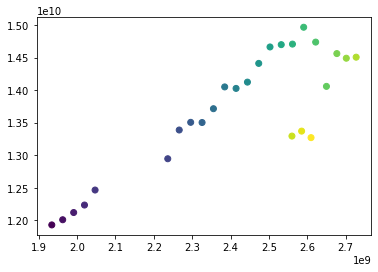

In [71]:
newmerge4 = pd.merge(newmerge3, newmerge2, on = 'Year')
newmerge4
plt.scatter(newmerge4['value'], newmerge4['Total Emissions'], c = newmerge4['Year'])

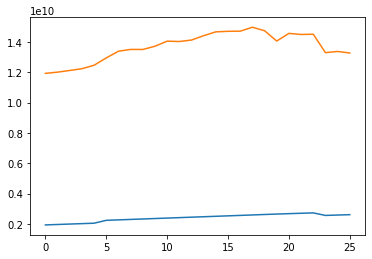

In [72]:
plt.plot(newmerge4['value'])
plt.plot(newmerge4['Total Emissions'])

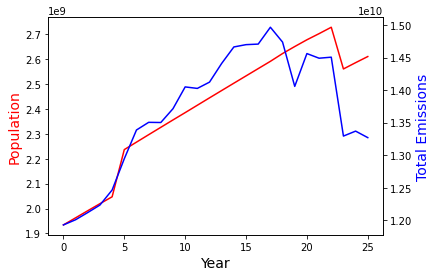

In [73]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(newmerge4['value'], color = 'red')
# set x-axis label
ax.set_xlabel("Year", fontsize = 14)
# set y-axis label
ax.set_ylabel("Population",
              color="red",
              fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(newmerge4['Total Emissions'], color = 'blue')
ax2.set_ylabel("Total Emissions",color="blue",fontsize=14)
plt.savefig('twolineplot.png')
plt.show()


In [74]:
totalpopulation2.head()

,Country Name,variable,value
2,Afghanistan,1960,8996967.0
268,Afghanistan,1961,9169406.0
534,Afghanistan,1962,9351442.0
800,Afghanistan,1963,9543200.0
1066,Afghanistan,1964,9744772.0


In [75]:
stringency_index

,COU,Country,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags,RoundedValue
95,BEL,Belgium,EPS,Environmental Policy Stringency,1990,1990,IDX,Index,0,Units,NaN,NaN,0.666667,NaN,NaN,1.0
96,BEL,Belgium,EPS,Environmental Policy Stringency,1991,1991,IDX,Index,0,Units,NaN,NaN,0.666667,NaN,NaN,1.0
97,BEL,Belgium,EPS,Environmental Policy Stringency,1992,1992,IDX,Index,0,Units,NaN,NaN,0.708333,NaN,NaN,1.0
98,BEL,Belgium,EPS,Environmental Policy Stringency,1993,1993,IDX,Index,0,Units,NaN,NaN,0.770833,NaN,NaN,1.0
99,BEL,Belgium,EPS,Environmental Policy Stringency,1994,1994,IDX,Index,0,Units,NaN,NaN,0.770833,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17217,IDN,Indonesia,EPS,Environmental Policy Stringency,2011,2011,IDX,Index,0,Units,NaN,NaN,1.166667,NaN,NaN,1.0
17218,IDN,Indonesia,EPS,Environmental Policy Stringency,2012,2012,IDX,Index,0,Units,NaN,NaN,1.166667,NaN,NaN,1.0
17219,IDN,Indonesia,EPS,Environmental Policy Stringency,2013,2013,IDX,Index,0,Units,NaN,NaN,1.083333,NaN,NaN,1.0
17220,IDN,Indonesia,EPS,Environmental Policy Stringency,2014,2014,IDX,Index,0,Units,NaN,NaN,1.083333,NaN,NaN,1.0


In [76]:
scatterplot = stringency_index[stringency_index['Variable'] == 'Environmental Policy Stringency']

In [77]:
scatterplot

,COU,Country,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags,RoundedValue
95,BEL,Belgium,EPS,Environmental Policy Stringency,1990,1990,IDX,Index,0,Units,NaN,NaN,0.666667,NaN,NaN,1.0
96,BEL,Belgium,EPS,Environmental Policy Stringency,1991,1991,IDX,Index,0,Units,NaN,NaN,0.666667,NaN,NaN,1.0
97,BEL,Belgium,EPS,Environmental Policy Stringency,1992,1992,IDX,Index,0,Units,NaN,NaN,0.708333,NaN,NaN,1.0
98,BEL,Belgium,EPS,Environmental Policy Stringency,1993,1993,IDX,Index,0,Units,NaN,NaN,0.770833,NaN,NaN,1.0
99,BEL,Belgium,EPS,Environmental Policy Stringency,1994,1994,IDX,Index,0,Units,NaN,NaN,0.770833,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17217,IDN,Indonesia,EPS,Environmental Policy Stringency,2011,2011,IDX,Index,0,Units,NaN,NaN,1.166667,NaN,NaN,1.0
17218,IDN,Indonesia,EPS,Environmental Policy Stringency,2012,2012,IDX,Index,0,Units,NaN,NaN,1.166667,NaN,NaN,1.0
17219,IDN,Indonesia,EPS,Environmental Policy Stringency,2013,2013,IDX,Index,0,Units,NaN,NaN,1.083333,NaN,NaN,1.0
17220,IDN,Indonesia,EPS,Environmental Policy Stringency,2014,2014,IDX,Index,0,Units,NaN,NaN,1.083333,NaN,NaN,1.0


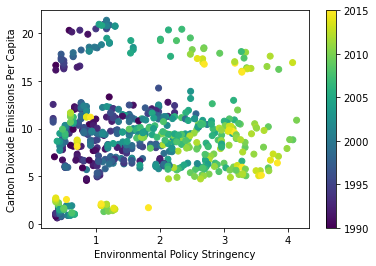

In [78]:
plt.scatter(x = merge5['Value'], y = merge5['co2_per_capita_x'], c = merge5['year'])
plt.colorbar()
plt.xlabel('Environmental Policy Stringency')
plt.ylabel('Carbon Dioxide Emissions Per Capita')
plt.savefig('scatter.png')

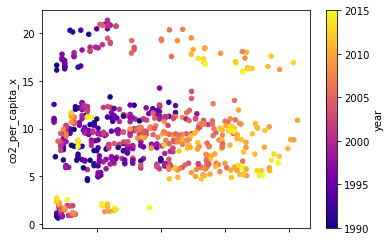

In [79]:
merge5.plot.scatter(x = 'Value', y = 'co2_per_capita_x', c = 'year', colormap = 'plasma')
plt.xlabel('Population')
plt.show()

In [80]:
merge5

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue
3380,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0
3407,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0
3434,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0
3461,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1
3488,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0
...,...,...,...,...,...,...,...,...,...
118834,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2
118861,United States,2012,34.331,17.000,United States,2012,17.000,3.166667,3
118888,United States,2013,34.589,17.302,United States,2013,17.302,2.666667,3
118915,United States,2014,34.838,17.331,United States,2014,17.331,2.583333,3


In [81]:
newmerge4

,Year,value,Total Emissions
0,1990,1.934271e+09,1.192736e+10
1,1991,1.962684e+09,1.200692e+10
2,1992,1.991292e+09,1.211788e+10
3,1993,2.019488e+09,1.223309e+10
4,1994,2.047088e+09,1.246390e+10
5,1995,2.236477e+09,1.294505e+10
6,1996,2.266353e+09,1.338700e+10
7,1997,2.296234e+09,1.350491e+10
8,1998,2.325907e+09,1.350226e+10
9,1999,2.355525e+09,1.371471e+10


In [82]:
newmerge

,country,Year,population_density,co2_per_capita_x,Country,year,co2_per_capita_y,Value,RoundedValue,Country Name,variable,value,Total Emissions
0,Australia,1990,2.205,16.471,Australia,1990,16.471,0.500000,0,Australia,1990,17065100.0,2.810793e+08
1,Australia,1991,2.235,16.398,Australia,1991,16.398,0.500000,0,Australia,1991,17284000.0,2.834230e+08
2,Australia,1992,2.262,16.454,Australia,1992,16.454,0.500000,0,Australia,1992,17495000.0,2.878627e+08
3,Australia,1993,2.289,16.550,Australia,1993,16.550,0.750000,1,Australia,1993,17667000.0,2.923888e+08
4,Australia,1994,2.314,16.860,Australia,1994,16.860,0.500000,0,Australia,1994,17855000.0,3.010353e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,United States,2011,34.063,17.781,United States,2011,17.781,2.475000,2,United States,2011,311583481.0,5.540266e+09
630,United States,2012,34.331,17.000,United States,2012,17.000,3.166667,3,United States,2012,313877662.0,5.335920e+09
631,United States,2013,34.589,17.302,United States,2013,17.302,2.666667,3,United States,2013,316059947.0,5.468469e+09
632,United States,2014,34.838,17.331,United States,2014,17.331,2.583333,3,United States,2014,318386329.0,5.517953e+09
